In [ ]:
import pandas as pd
import numpy as np


: 

In [ ]:
Raw_Housing_Data=pandas.read_csv("Housing_Prices.csv")

: 

In [ ]:
Raw_Housing_Data

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,None,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,None,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,None,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,None,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


: 

In [ ]:
Raw_Housing_Data['mean_sales']=Raw_Housing_Data['Sale Price'].mean()
Raw_Housing_Data['mean_sales'].head()


0    540198.435744
1    540198.435744
2    540198.435744
3    540198.435744
4    540198.435744
Name: mean_sales, dtype: float64

: 

In [ ]:
import matplotlib.pyplot as plt


: 

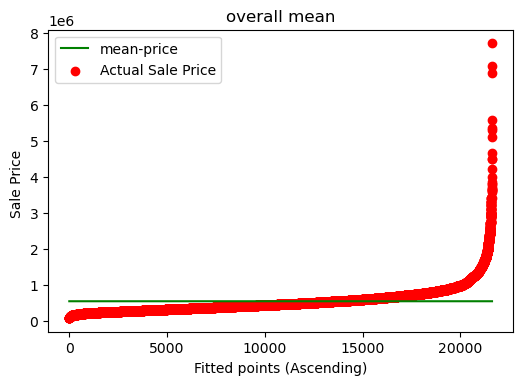

: 

In [ ]:
plt.figure(dpi=100)
k=range(0,len(Raw_Housing_Data))
plt.scatter(k,Raw_Housing_Data['Sale Price'].sort_values(),color='red',label='Actual Sale Price')
plt.plot(k,Raw_Housing_Data['mean_sales'].sort_values(),color='green',label='mean-price')
plt.xlabel('Fitted points (Ascending)')
plt.ylabel("Sale Price ")
plt.title('overall mean')
plt.legend()

In [ ]:
import numpy as np

: 

In [ ]:
grades_mean=Raw_Housing_Data.pivot_table(values='Sale Price',columns='Overall Grade',aggfunc=np.mean)
grades_mean

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale Price,142000.0,3.710769e+06,205666.666667,214381.034483,248523.971074,301916.570658,402604.370865,542892.66271,773738.22218,1.239055e+06


: 

In [ ]:
Raw_Housing_Data['grade_mean']=0
for i in grades_mean.columns:
    Raw_Housing_Data['grade_mean'][Raw_Housing_Data['Overall Grade']==i]=grades_mean[i][0]
    
Raw_Housing_Data['grade_mean'].head()    

C:\Users\raghu\AppData\Local\Temp/ipykernel_13264/4157528370.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Raw_Housing_Data['grade_mean'][Raw_Housing_Data['Overall Grade']==i]=grades_mean[i][0]
C:\Users\raghu\AppData\Local\Temp/ipykernel_13264/4157528370.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Raw_Housing_Data['grade_mean'][Raw_Housing_Data['Overall Grade']==i]=grades_mean[i][0]


0    402604.370865
1    402604.370865
2    301916.570658
3    402604.370865
4    542892.662710
Name: grade_mean, dtype: float64

: 

In [ ]:
mean_difference=Raw_Housing_Data['mean_sales']-Raw_Housing_Data['Sale Price']
grade_mean_difference=Raw_Housing_Data['grade_mean']-Raw_Housing_Data['Sale Price']

: 

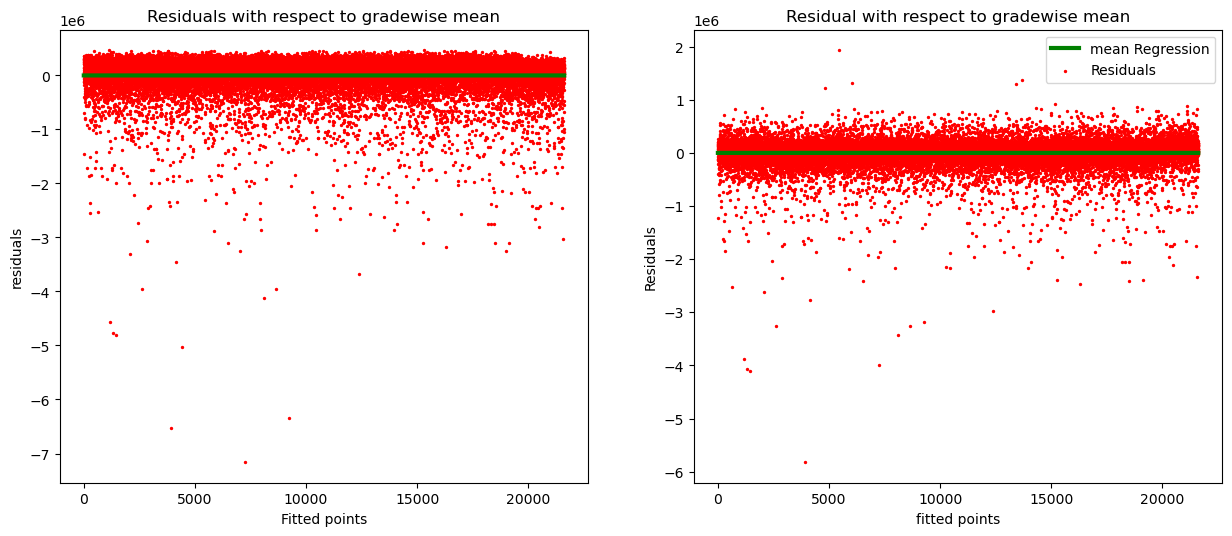

: 

In [ ]:
k= range(0,len(Raw_Housing_Data))
l=[0 for i in range(len(Raw_Housing_Data))]
plt.figure(figsize=(15,6),dpi=100)

plt.subplot(1,2,1)
plt.scatter(k,mean_difference,color='red',label='Residuals',s=2)
plt.plot(k,l,color='green',label='mean Regression',linewidth=3)
plt.xlabel('Fitted points')
plt.ylabel("residuals")
plt.title("Residuals with respect to gradewise mean")

plt.subplot(1,2,2)
plt.scatter(k,grade_mean_difference,color="red",label="Residuals",s=2)
plt.plot(k,l,color="green",label="mean Regression",linewidth=3)
plt.xlabel("fitted points")
plt.ylabel("Residuals")
plt.legend()
plt.title("Residual with respect to gradewise mean")

plt.legend()

In [ ]:
Y=Raw_Housing_Data['Sale Price']
Y_hat1=Raw_Housing_Data["mean_sales"]
Y_hat2=Raw_Housing_Data["grade_mean"]
n=len(Raw_Housing_Data)

len(Y),len(Y_hat1),len(Y_hat2),n

(21613, 21613, 21613, 21613)

: 

In [ ]:
Raw_Housing_Data.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
mean_sales   

: 

In [ ]:
from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Columns of dtype object are imputed with the most frequent value in column. Columns of other types are imputed with mean of column."""
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in 
            X],index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.fill)
X = pd.DataFrame(Raw_Housing_Data) 
Raw_Housing_Data= DataFrameImputer().fit_transform(X)
Raw_Housing_Data.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
mean_sales   

: 

In [ ]:
from sklearn.metrics import mean_absolute_error
cost_grade_mean=mean_absolute_error(Y_hat2,Y)
cost_grade_mean

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

: 

: 